In [1]:
import numpy as np, pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
# Set paths to phenotype data
## 1) the parental data (parents)
## 2) the initial set of segregants (old)
## 3) the latest set of segregants (new)
## Note, these data where previously processed
## And the halo per replicates / experimetns where calcualted
parent_data_path = "../../PHENOTYPE/AMOEBA/HALOS/bt22xftc555_halo_new_parents.csv"
old_data_path = "../../PHENOTYPE/AMOEBA/HALOS/bt22xftc555_halo_old.csv"
new_data_path = "../../PHENOTYPE/AMOEBA/HALOS/bt22xftc555_halo_new.csv"

In [3]:
## Gather parental data
## and average by replicate per experiment
PNd = pd.read_csv(parent_data_path)
PNda = PNd.groupby(["PMY","Z"]).mean().reset_index().groupby("PMY").mean().reset_index()
PNda.drop("Z", axis = 1, inplace = True)

## Gather PMY numbers of paretns
parent_pmy = PNda.PMY.tolist()

## view head
PNda.head()

,PMY,Replicate,Halo
0,PMY2649,2.041667,4.777181
1,PMY2650,2.000000,1.036667


In [4]:
## Gather the latest data and average across repliacates, view head
Nd = pd.read_csv(new_data_path)
Nda = Nd[~(Nd.isin(parent_pmy))].groupby("PMY").mean().reset_index()
Nda.head()

,PMY,Replicate,Halo
0,PMY2603,2.0,1.194667
1,PMY2604,2.0,2.377667
2,PMY2605,2.0,6.427667
3,PMY2606,2.0,1.315333
4,PMY2607,2.0,2.287000


In [5]:
## For the inital (old) data load in and average replicates
Od = pd.read_csv(old_data_path)
Oda = Od[~(Od.isin(parent_pmy))].groupby("PMY").mean().reset_index()
Oda.head()

,PMY,Replicate,Halo
0,PMY2556,1.5,3.3180
1,PMY2557,1.5,2.5775
2,PMY2558,1.5,1.0930
3,PMY2559,1.5,0.6710
4,PMY2560,1.5,0.6040


In [6]:
## Concatonate resluts
Halo = pd.concat([PNda, Oda, Nda]).reset_index(drop = True)

## Convert inches to cm
Halo["Halo_in"] = Halo.Halo
cm_con = (2.54)**2
Halo["Halo"] = Halo.Halo_in.values*cm_con

## Set index
Halo.index = Halo.PMY
## View head
Halo.head()

,PMY,Replicate,Halo,Halo_in
PMY,,,,
PMY2649,PMY2649,2.041667,30.820458,4.777181
PMY2650,PMY2650,2.000000,6.688159,1.036667
PMY2556,PMY2556,1.500000,21.406409,3.318000
PMY2557,PMY2557,1.500000,16.628999,2.577500
PMY2558,PMY2558,1.500000,7.051599,1.093000


In [7]:
## Check the number of times each sample appears in dataframe
pmy, pn = np.unique(Halo.PMY.values, return_counts = True)

if np.max(pn)>1:
    print(pmy[(pn>1)])

In [8]:
## Define parental names and PMY labels
parents = ['Bt22','Ftc555-1']
parent_pmy = ['PMY2649', 'PMY2650']

## Gather segregants
Map_pop = pmy

## Set ylable
myylabel = 'Amoeba clearance area (cm$^2$)\n$\longleftarrow$resistant - sensitive$\longrightarrow$'

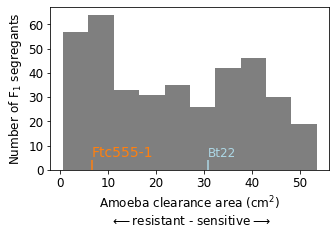

In [10]:
## Plot segregant halo phenotypes
fig,ax = plt.subplots(1,1,figsize=(5,3),sharey=True)

plt.sca(ax)
## Plot all
plt.hist(Halo[(Halo.PMY.isin(Map_pop))].Halo.values,
         color='k',alpha=0.5)
         
## Label x and y axis
plt.xlabel(myylabel,fontsize=12)
plt.ylabel('Number of F$_1$ segregants',fontsize=12);

## Plot parent
ftc555_growth = Halo[(Halo.PMY==parent_pmy[1])].Halo
plt.vlines(ftc555_growth,
           0,4,color='tab:orange')

## annotate the parental strain name
plt.text(ftc555_growth,7,s=parents[1],
         va='center',ha='left',
         fontsize=14,color='tab:orange')


## Plot parent
bt22_growth = Halo[(Halo.PMY==parent_pmy[0])].Halo
plt.vlines(bt22_growth,
           0,4,color='lightblue')

## Annotate the parental strain name
plt.text(bt22_growth,7,s=parents[0],
         va='center',ha='left',
         fontsize=12,color='lightblue');

plt.yticks(fontsize=12);
plt.xticks(fontsize=12);

In [11]:
## Save out average data
savepath = '../../PHENOTYPE/AMOEBA/HALOS/bt22xftc555_halo_average.csv.gz'
Halo.to_csv(savepath,index=False)